In [19]:
%run ./tools.ipynb

In [20]:
def plot_xco2_diff(diff_before, diff_after, lat_slice, lon_slice, imonth):
    '''Produce plots of XCO2 differences
    inputs (1d arrays): 
        diff in XCO2, before and after
        lat_slice, lon_slice, lat and lon for each data point
        imonth, month number, for plot title
    outputs: plots
        '''
    nobs = len(diff_before)
    # Creat target dataarray and dataset
    lat_res = 2.    # horizontal resolution of lat and lon you would want
    lon_res = 2.5
    lat = np.linspace(-90, 90, int(180/lat_res + 1)) # grid
    lon = np.linspace(-180, 177.5, int(360/lon_res))
    diff_1 = xr.DataArray(data = np.nan, 
                        dims = ('lat', 'lon'), 
                        coords = {'lat': lat,
                                'lon': lon},
                        name = 'diff')
    diff_2 = xr.DataArray(data = np.nan, 
                        dims = ('lat', 'lon'), 
                        coords = {'lat': lat,
                                'lon': lon},
                        name = 'diff')
    # map 1d data onto dataarray
    for i in range(nobs):
        lat = int((lat_slice[i].values + 90)/2) # lat index
        lon = int((lon_slice[i].values + 180)/2.5)
        diff_1[lat, lon] = -diff_before[i]
        diff_2[lat, lon] = -diff_after[i]

    print('ydiff before:',"{:.2f}".format(diff_1.mean().values))
    print('ydiff after:',"{:.2f}".format(diff_2.mean().values))

    # figure 1, distribution
    fig, axes = plt.subplots(1, 2, 
                             figsize=[14, 6], 
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             gridspec_kw={'hspace': 0.2, 'wspace': 0})
    # before
    diff_1.plot(ax=axes[0], vmax = 3, add_labels = False, cbar_kwargs={'shrink': 0.5})
    axes[0].set_title(short_name_of_month(imonth) + ' XCO2: a prior - OCO2', loc='left')
    axes[0].set_title('ppm', loc = 'right')
    axes[0].coastlines()
    axes[0].gridlines(linestyle = '--')
    # after
    diff_2.plot(ax=axes[1], vmax = 3, add_labels = False, cbar_kwargs={'shrink': 0.5})
    axes[1].set_title(short_name_of_month(imonth) + ' XCO2: a posterior - OCO2', loc='left')
    axes[1].set_title('ppm', loc = 'right')
    axes[1].coastlines()
    axes[1].gridlines(linestyle = '--')

    fig.savefig(mod_dir + 'results_map_diff_' + str(imonth) + '.png', dpi=300)
    
    # figure 2, scatter plot
    fig = plt.figure(figsize=[5,5])
    plt.scatter(xco2_oco_slice, xco2_mod_slice, s=0.7, label = 'A prior')
    plt.scatter(xco2_oco_slice, xco2_mod_slice+diff_new, s=0.7, label = 'A posterior')
    plt.plot([300,450],[300,450], c='r')
    plt.ylim(top   = 420,bottom = 395)
    plt.xlim(right = 420,left   = 395)
    plt.title(name_month + ' XCO2 (ppm)')
    plt.ylabel('GEOS-Chem')
    plt.xlabel('OCO2')
    plt.legend(markerscale = 4)
    
    fig.savefig(mod_dir + 'results_scatter_diff_' + str(imonth) + '.png', dpi=300)
    

In [21]:
# fossil fuel flux, monthly, 22 regions, 2018,
monthly_ff_flux = np.array([[0.00939884, 0.01352066, 0.01217259, 0.01317945, 0.03286598,
                            0.04919775, 0.04947141, 0.00047815, 0.00071629, 0.05524441,
                            0.07853806, 0.00510446, 0.00227586, 0.01140763, 0.02883254,
                            0.02892284, 0.33279347, 0.07246963, 0.03163082, 0.00801022,
                            0.02419291, 0.05158862],
                           [0.00882603, 0.01205854, 0.01103238, 0.01171708, 0.03227255,
                            0.04837306, 0.04865225, 0.00046638, 0.00068027, 0.05305397,
                            0.07148177, 0.00484694, 0.00205397, 0.01080909, 0.02659273,
                            0.02594644, 0.27710018, 0.06445586, 0.02819559, 0.00681585,
                            0.02071517, 0.0477504 ],
                           [0.00912856, 0.01352689, 0.01251454, 0.01304371, 0.03141444,
                            0.04681482, 0.04728818, 0.00045841, 0.0006987 , 0.05616395,
                            0.07477014, 0.00505084, 0.00220638, 0.01073718, 0.02848925,
                            0.02865971, 0.30283058, 0.07155537, 0.03151393, 0.00743873,
                            0.02378998, 0.05059177],
                           [0.00908764, 0.01293285, 0.0117066 , 0.01216457, 0.0284836 ,
                            0.04287154, 0.04288896, 0.0004201 , 0.00064224, 0.05087521,
                            0.06609669, 0.00498919, 0.00217214, 0.01214541, 0.02492351,
                            0.02791565, 0.29362029, 0.06840647, 0.02794808, 0.00723465,
                            0.02047742, 0.04666124],
                           [0.00929902, 0.01355332, 0.01225532, 0.01302272, 0.02851556,
                            0.04329539, 0.04282479, 0.00042277, 0.00062066, 0.05122236,
                            0.06358261, 0.00502553, 0.00224967, 0.01195951, 0.02660337,
                            0.02863559, 0.29909802, 0.07140524, 0.02808682, 0.00737136,
                            0.01975153, 0.04723748],
                           [0.00939433, 0.01324482, 0.0122544 , 0.01287798, 0.02895732,
                            0.04446059, 0.04344021, 0.00042853, 0.00059608, 0.04948422,
                            0.06095971, 0.00499589, 0.00225503, 0.01270911, 0.02653514,
                            0.02870161, 0.29660033, 0.06675711, 0.02778849, 0.00725539,
                            0.02014263, 0.04632773],
                           [0.01017133, 0.0136405 , 0.01229109, 0.01289027, 0.03022436,
                            0.04660315, 0.04540032, 0.0004478 , 0.00060102, 0.05051667,
                            0.05973182, 0.00510261, 0.0023038 , 0.01306759, 0.02772127,
                            0.02871765, 0.30521715, 0.06309203, 0.02752948, 0.00736907,
                            0.01876868, 0.04659817],
                           [0.01013668, 0.01395077, 0.01265041, 0.01295721, 0.03177766,
                            0.04922763, 0.04774581, 0.00046923, 0.00060933, 0.04814643,
                            0.06099922, 0.00512495, 0.00234627, 0.01326553, 0.02796812,
                            0.02963224, 0.30428211, 0.06287361, 0.02818145, 0.00738024,
                            0.02010707, 0.04707754],
                           [0.0095443 , 0.0134836 , 0.0122192 , 0.01200515, 0.0287897 ,
                            0.04405945, 0.04333181, 0.00042656, 0.00061891, 0.05095883,
                            0.06193217, 0.00508742, 0.0023199 , 0.01170719, 0.02699394,
                            0.02901534, 0.29912897, 0.06243389, 0.02715226, 0.00724719,
                            0.01933869, 0.04565167],
                           [0.00935047, 0.01380326, 0.01239223, 0.01319369, 0.02983096,
                            0.04508696, 0.04481295, 0.00043943, 0.00065331, 0.05211454,
                            0.07062894, 0.00519697, 0.00232819, 0.01195752, 0.02808588,
                            0.02926531, 0.30250801, 0.06923579, 0.02948583, 0.00749119,
                            0.0220736 , 0.0484452 ],
                           [0.00923655, 0.01328769, 0.01213624, 0.01277024, 0.02988255,
                            0.0445894 , 0.04494842, 0.00043687, 0.00066618, 0.05200326,
                            0.07307927, 0.00498044, 0.00226383, 0.01238009, 0.02718693,
                            0.02856405, 0.30677231, 0.06886714, 0.02977036, 0.0075065 ,
                            0.02214391, 0.04870048],
                           [0.00939884, 0.01352066, 0.01217259, 0.01317945, 0.03286598,
                            0.04919775, 0.04947141, 0.00047815, 0.00071629, 0.05524441,
                            0.07853806, 0.00510446, 0.00227586, 0.01140763, 0.02883254,
                            0.02892284, 0.33279347, 0.07246963, 0.03163082, 0.00801022,
                            0.02419291, 0.05158862]])
ff_flux_2018 = np.sum(monthly_ff_flux, axis = 1) # global net flux
#plt.plot(ff_flux_2018)

In [40]:
monthly_ff_flux[:,11]
#monthly_net_flux[:,11]

array([0.00510446, 0.00484694, 0.00505084, 0.00498919, 0.00502553,
       0.00499589, 0.00510261, 0.00512495, 0.00508742, 0.00519697,
       0.00498044, 0.00510446])

In [22]:
# net flux, monthly, 22 regions
monthly_net_flux = np.array([[-0.0064147 ,  0.07445906, -0.10581314,  0.02305773,  0.23837679,
                             0.26386957,  0.22911544,  0.07728346,  0.09897539,  0.28756375,
                             0.36633632,  0.15041014,  0.12210651, -0.11564749,  0.01955141,
                            -0.0105203 ,  0.63860122,  0.03680348,  0.14569273,  0.04243613,
                             0.59434582,  0.12670701],
                           [ 0.04448958,  0.00888961, -0.17399979,  0.01047562,  0.16182761,
                             0.1841661 ,  0.17366136,  0.05500812,  0.0761485 ,  0.15790085,
                             0.29273754,  0.19235391,  0.09473187, -0.19723211,  0.01438183,
                             0.01754501,  0.47276133,  0.04281528,  0.08758799,  0.032275  ,
                             0.45819631,  0.02629607],
                           [-0.03904325, -0.05196531, -0.11004996,  0.03000899,  0.11329988,
                             0.09688519,  0.10803165,  0.06161624,  0.07695003, -0.00312003,
                             0.30056612,  0.19386702,  0.02736085, -0.21489142,  0.01570047,
                             0.04379239,  0.4192146 ,  0.28369713,  0.01071397,  0.03408788,
                             0.51244586,  0.0163498 ],
                           [-0.02628382, -0.02097708, -0.00737329,  0.06662067, -0.00122051,
                            -0.12723264, -0.0457352 ,  0.0488416 ,  0.02293675, -0.27178127,
                             0.04589279,  0.16248327,  0.00108851, -0.14597134,  0.01211855,
                             0.06315739,  0.24290746,  0.35614459, -0.14091845,  0.02348104,
                             0.30512951, -0.09968819],
                           [ 0.01803107,  0.06984216,  0.09025795,  0.10887096, -0.17634585,
                            -0.29912442, -0.22012879, -0.02873586, -0.05275236, -0.44417846,
                            -0.49636077,  0.07047011, -0.05433822, -0.04425672,  0.01468228,
                             0.10753403,  0.01532049,  0.306318  , -0.25781675, -0.01484554,
                            -0.55475842, -0.3318801 ],
                           [ 0.03995982, -0.06950229,  0.11725599,  0.04820313, -0.40792831,
                            -0.30416459, -0.25926141, -0.20413501, -0.19508879, -0.28472521,
                            -0.80160416,  0.00745161, -0.00904155,  0.01500956,  0.01618913,
                             0.03840942, -0.03336745,  0.15003075, -0.10201374, -0.07068423,
                            -1.67339447, -0.47641225],
                           [ 0.01919811, -0.13490034,  0.13805936, -0.06298192, -0.35390222,
                            -0.22020304, -0.1449531 , -0.2389173 , -0.24942657,  0.01482722,
                            -0.41795171, -0.10537141, -0.03199819,  0.03777135,  0.01839562,
                             0.013893  , -0.03404708, -0.05481413,  0.02240025, -0.12022424,
                            -1.60681926, -0.44811588],
                           [-0.04738685, -0.06603833,  0.08814858, -0.07085706, -0.13035064,
                            -0.00201846, -0.10774618, -0.06712404, -0.1601901 ,  0.18746224,
                            -0.12796772, -0.19822794, -0.08612231,  0.09084938,  0.01896059,
                             0.00562349, -0.04031761, -0.14982693,  0.06003547, -0.07982452,
                            -0.68527422, -0.14865125],
                           [-0.12247829,  0.35941432,  0.00956134, -0.07055113,  0.01727857,
                             0.05087755,  0.03502709,  0.08565843,  0.01044127,  0.0565928 ,
                             0.07822011, -0.28711585, -0.14011593,  0.16050157,  0.01689712,
                            -0.00525722,  0.18342855, -0.19903888,  0.02404396, -0.00651329,
                             0.49605621,  0.13702924],
                           [-0.079821  ,  0.38125308, -0.12648625, -0.04260378,  0.15606699,
                             0.15009308,  0.14922913,  0.10465625,  0.09993308,  0.16801607,
                             0.37892645, -0.23910852, -0.05656457,  0.15449727,  0.01785115,
                             0.00288898,  0.39971869, -0.08488195,  0.07219775,  0.04648412,
                             0.788445  ,  0.24200536],
                           [ 0.00492083,  0.17452221, -0.14297589,  0.01400184,  0.2341404 ,
                             0.22236434,  0.19735325,  0.08273484,  0.10635675,  0.2291097 ,
                             0.3974018 , -0.08010411,  0.01700091,  0.05300111,  0.01697323,
                            -0.00615702,  0.52703348,  0.00569335,  0.11545969,  0.04592113,
                             0.6768642 ,  0.16645794],
                           [-0.00754005,  0.07385957, -0.10638479,  0.02398443,  0.2386446 ,
                             0.26386957,  0.23146184,  0.07645549,  0.09311629,  0.28755643,
                             0.36601319,  0.1502165 ,  0.12151426, -0.12053466,  0.01953446,
                            -0.00870257,  0.64087145,  0.03658765,  0.14569273,  0.04243613,
                             0.59196113,  0.11088942]])
net_flux_2018 = np.sum(monthly_net_flux, axis = 1) # global net flux
#plt.plot(net_flux_2018)

In [23]:
top_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/'
mod_dir = top_dir + 'CO2-2018/nd51/'
mode = 'N' # Nadir only
mod_err = 2.5 # model/transport error, unit: ppm
prior_err = 1.5 # intial prior error, unit: PgC/month/region

adjust_matrix = np.zeros((12,22)) # store adjustments for each region each month
updated_err = np.zeros((13,22)) # store updated error for each region each month


Jan adjustment: -1.49
ydiff before: 0.68
ydiff after: -0.12
Feb adjustment: -1.18
ydiff before: 0.94
ydiff after: 0.13
Mar adjustment: -1.14
ydiff before: 0.60
ydiff after: -0.13
Apr adjustment: -0.43
ydiff before: 0.12
ydiff after: 0.03
May adjustment: 0.78
ydiff before: -0.80
ydiff after: 0.25
Jun adjustment: 1.60
ydiff before: -1.94
ydiff after: -0.05
Jul adjustment: 1.78
ydiff before: -2.16
ydiff after: -0.32
Aug adjustment: 1.08
ydiff before: -1.45
ydiff after: -0.38
Sep adjustment: 1.10
ydiff before: -1.42
ydiff after: -0.17
Oct adjustment: 0.86
ydiff before: -1.31
ydiff after: -0.43
Nov adjustment: 0.50
ydiff before: -1.34
ydiff after: -0.78
Dec adjustment: 0.51
ydiff before: -1.36
ydiff after: -0.80


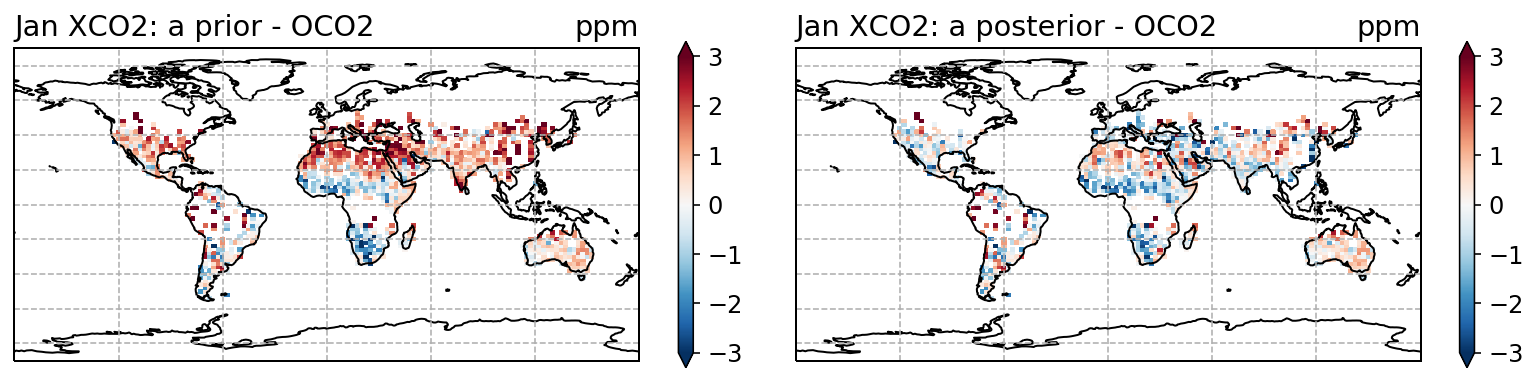

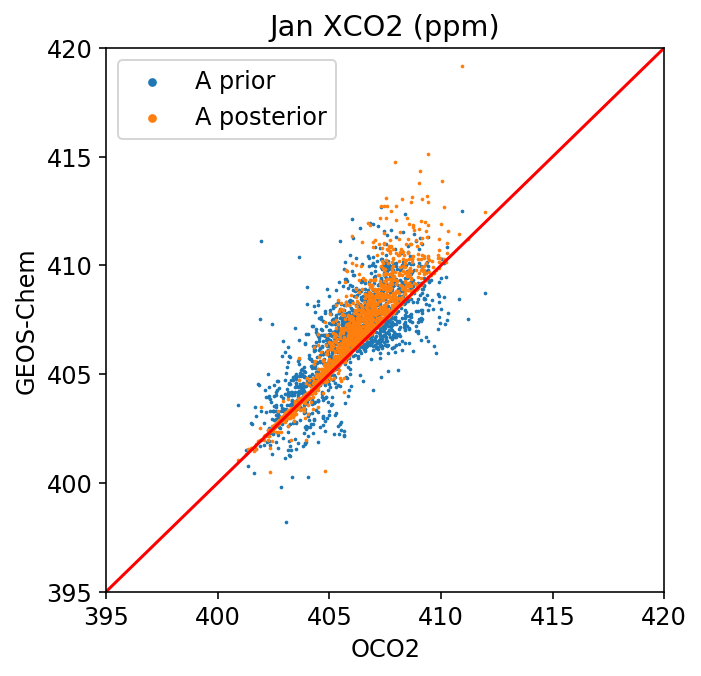

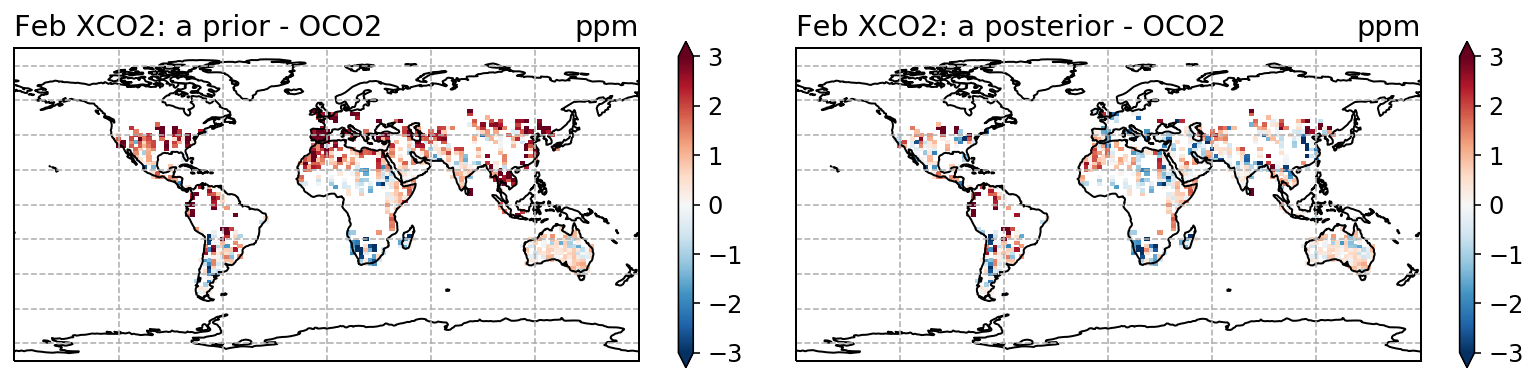

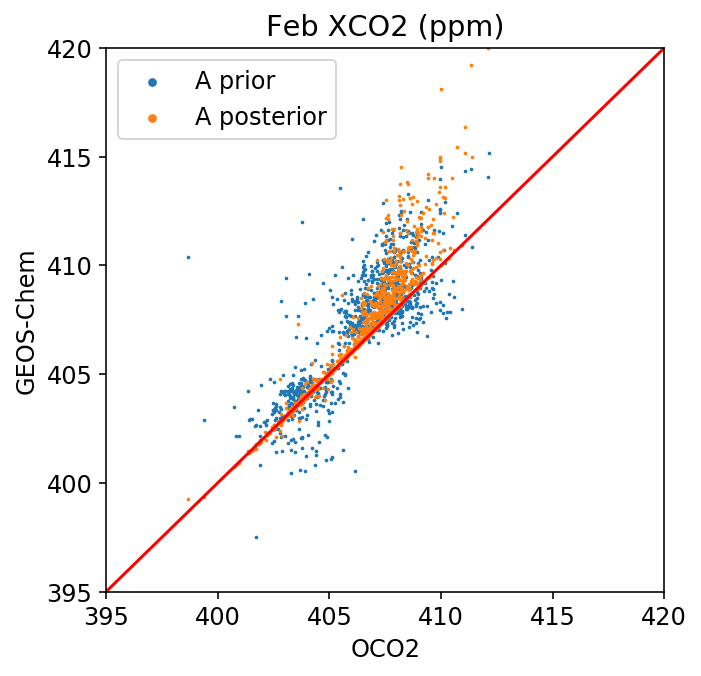

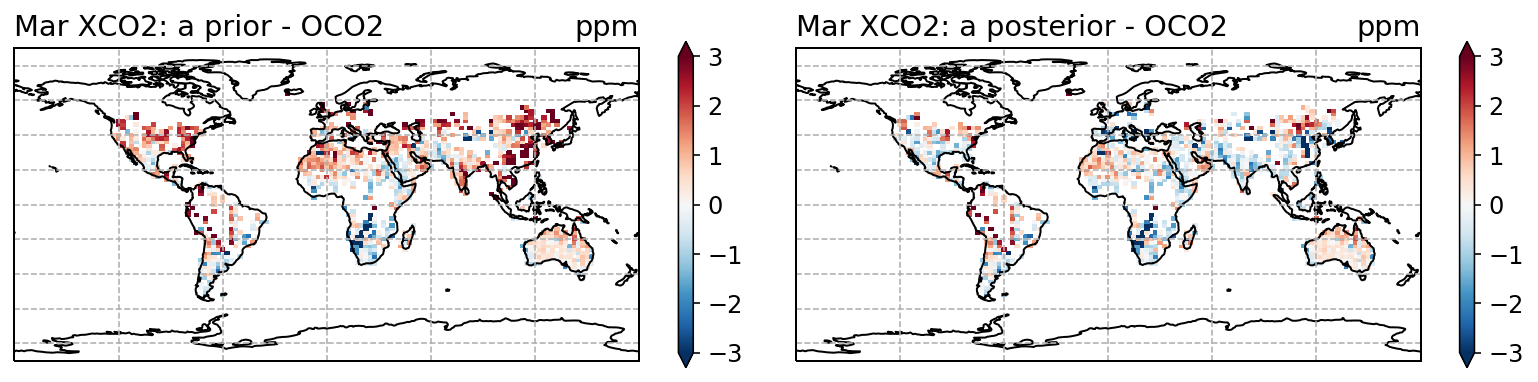

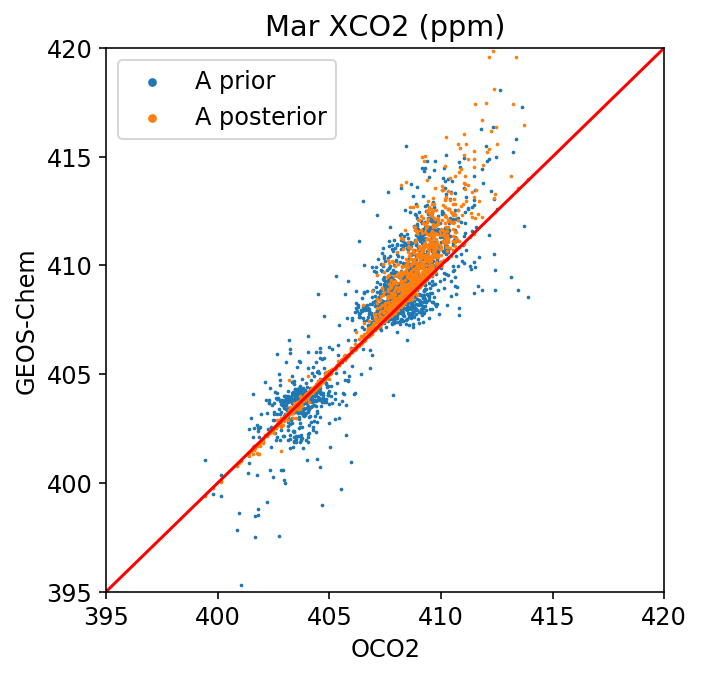

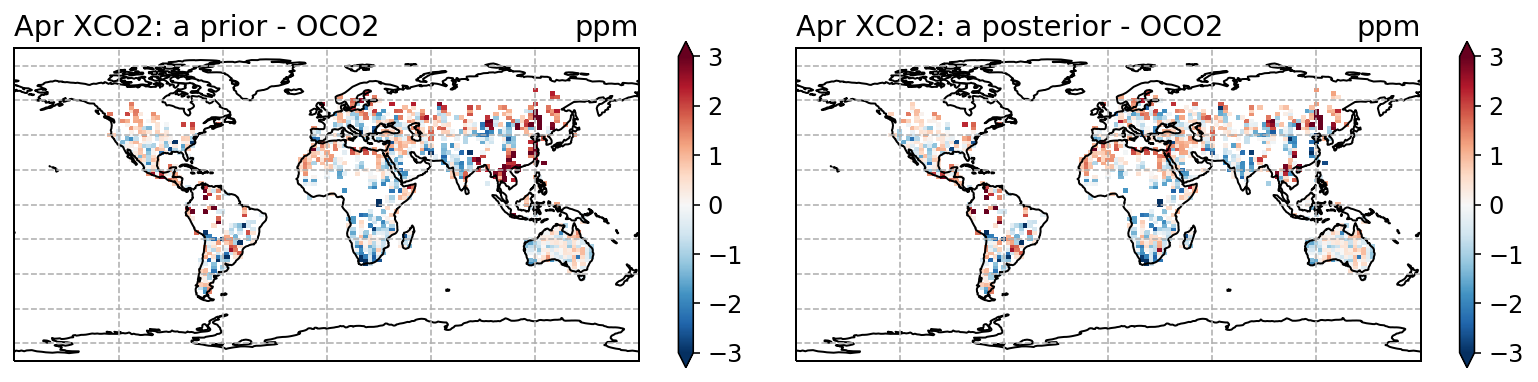

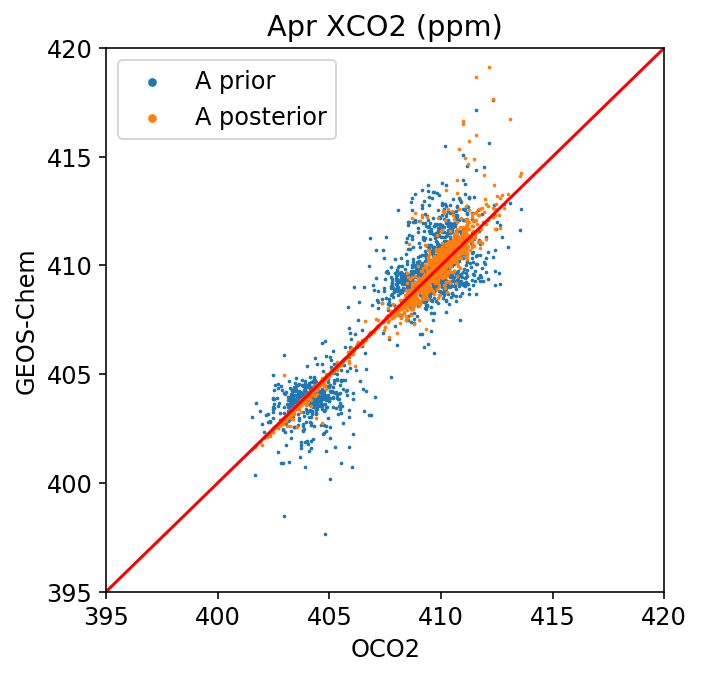

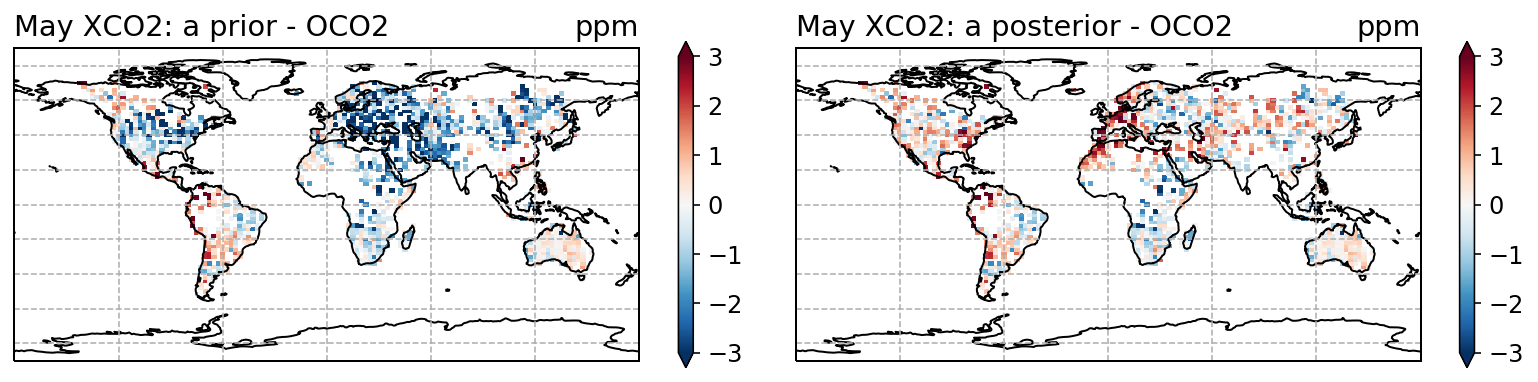

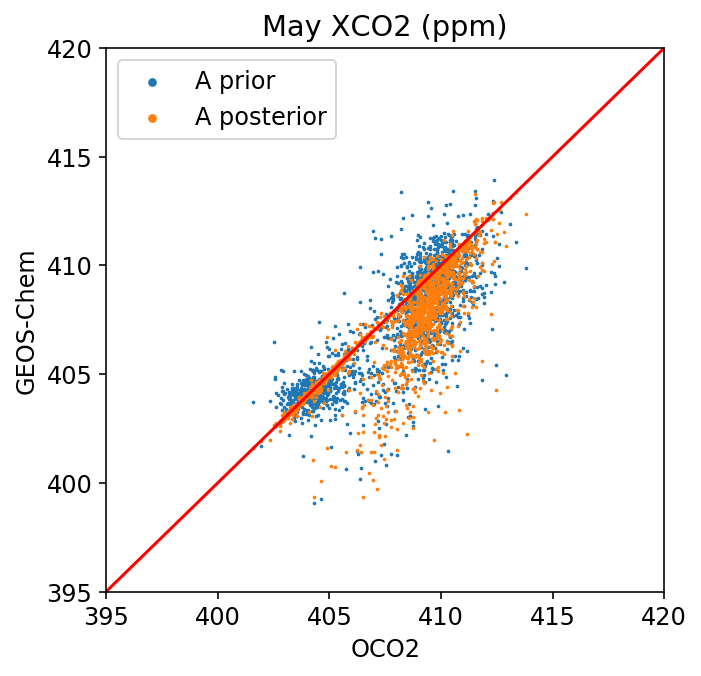

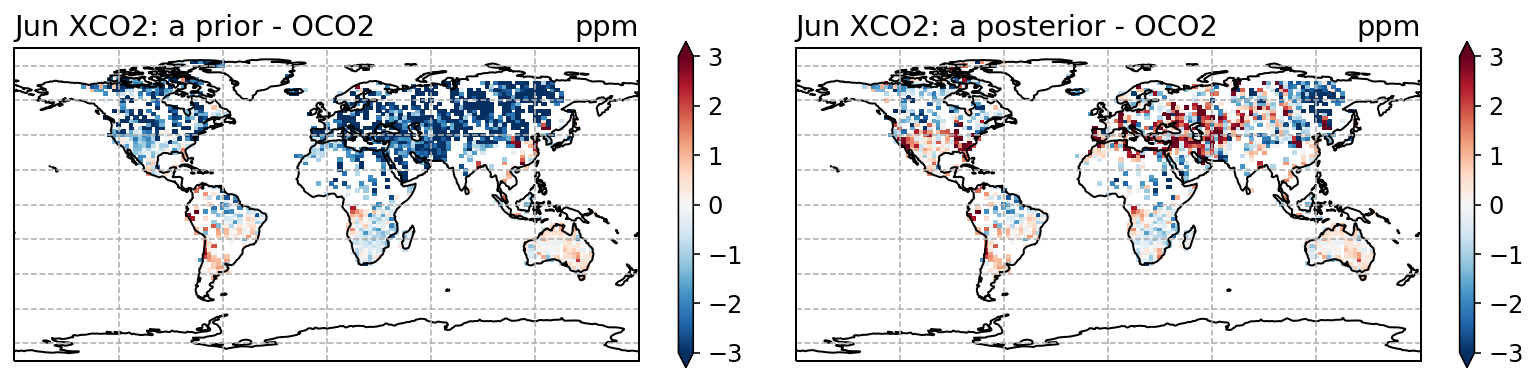

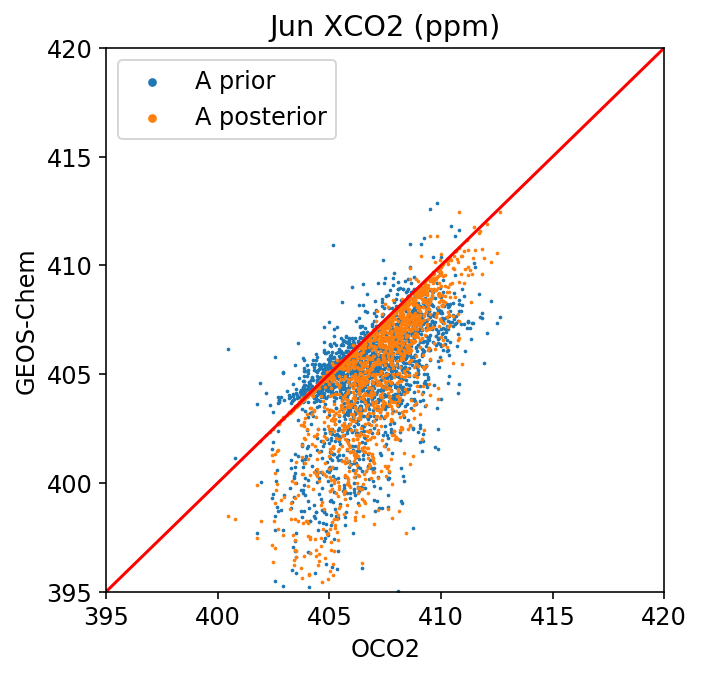

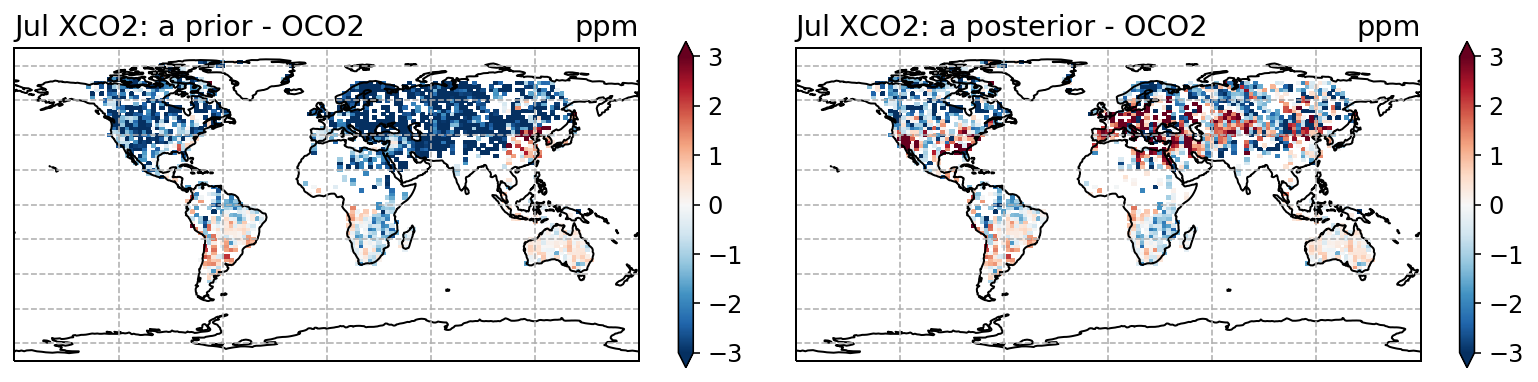

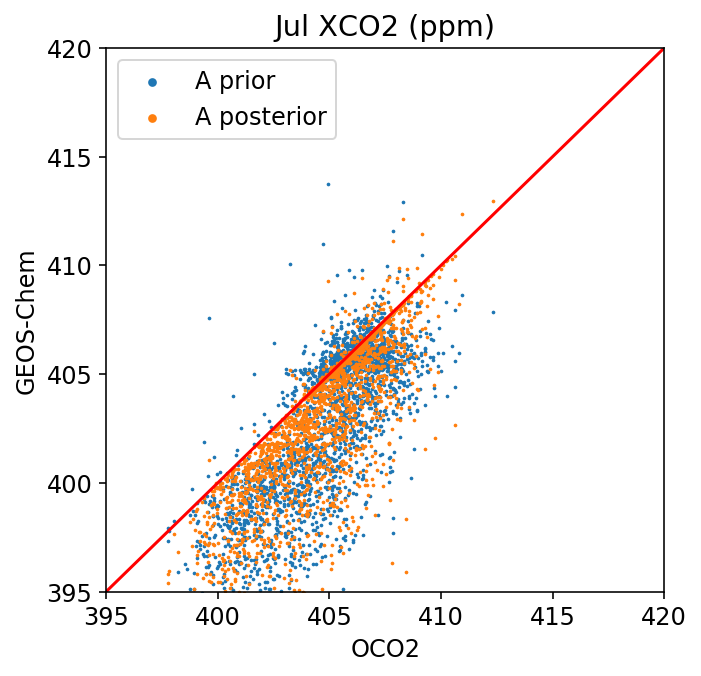

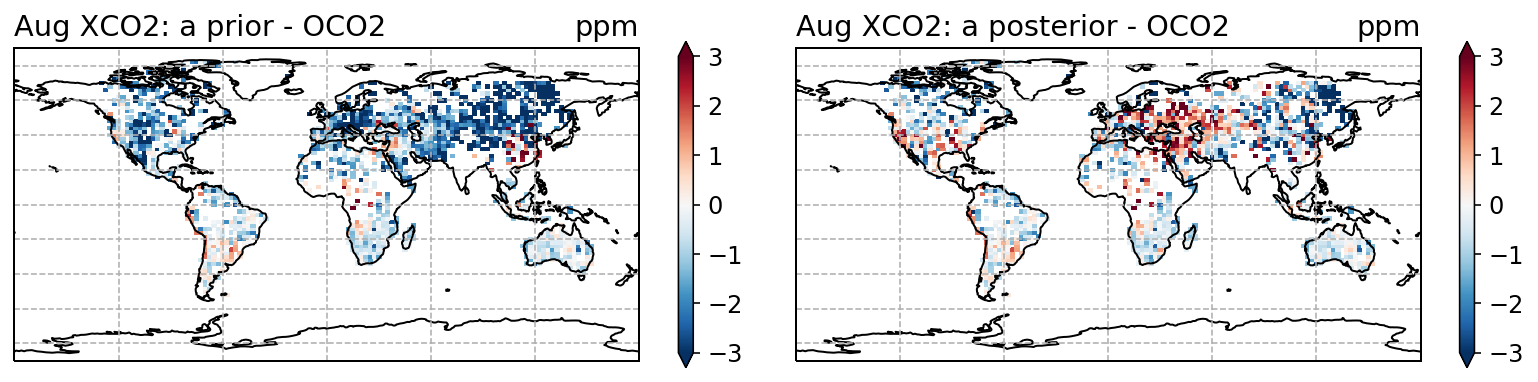

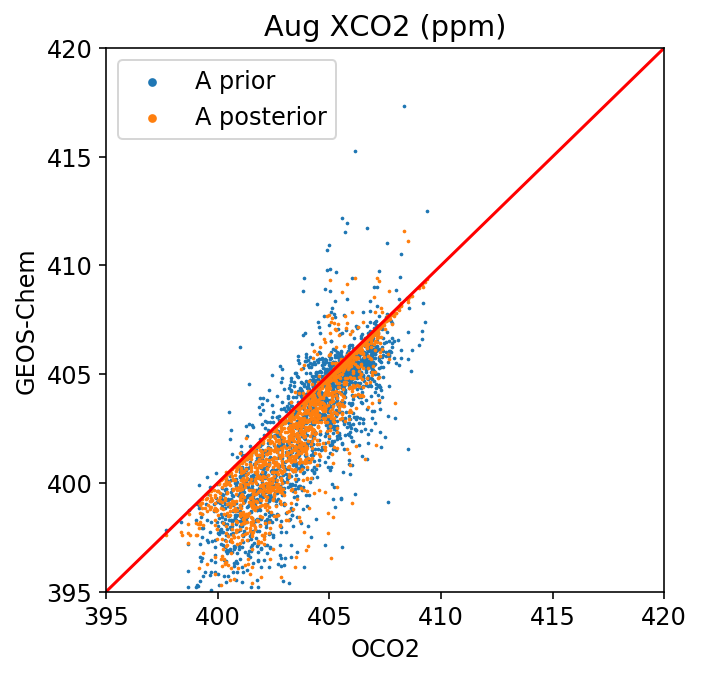

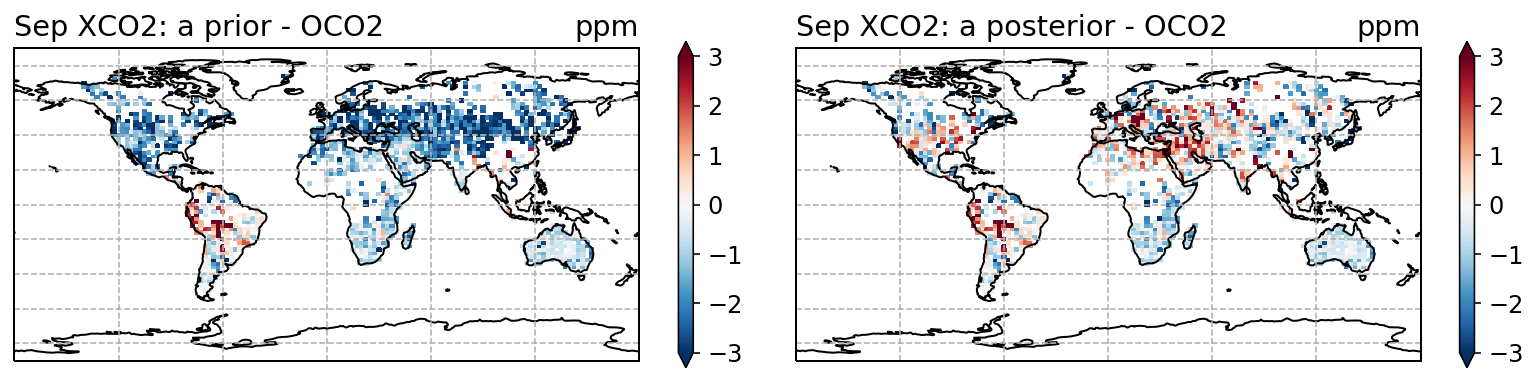

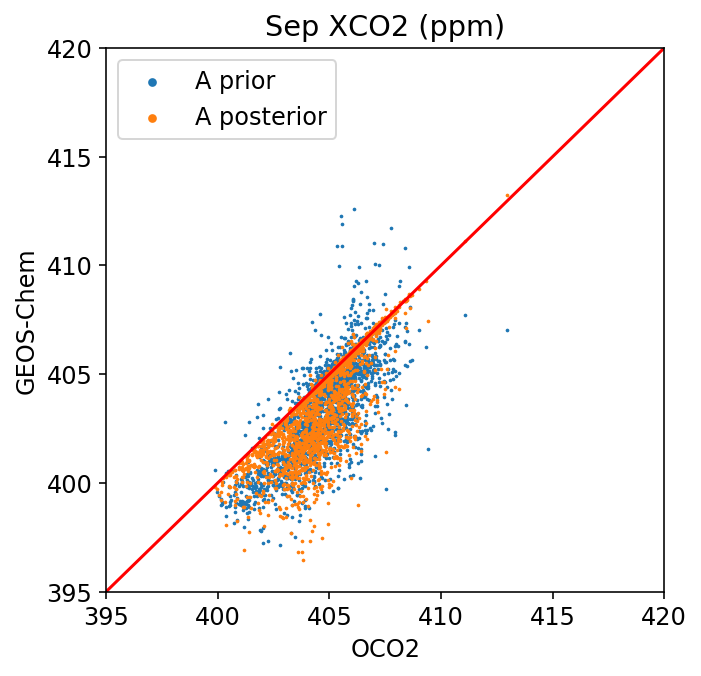

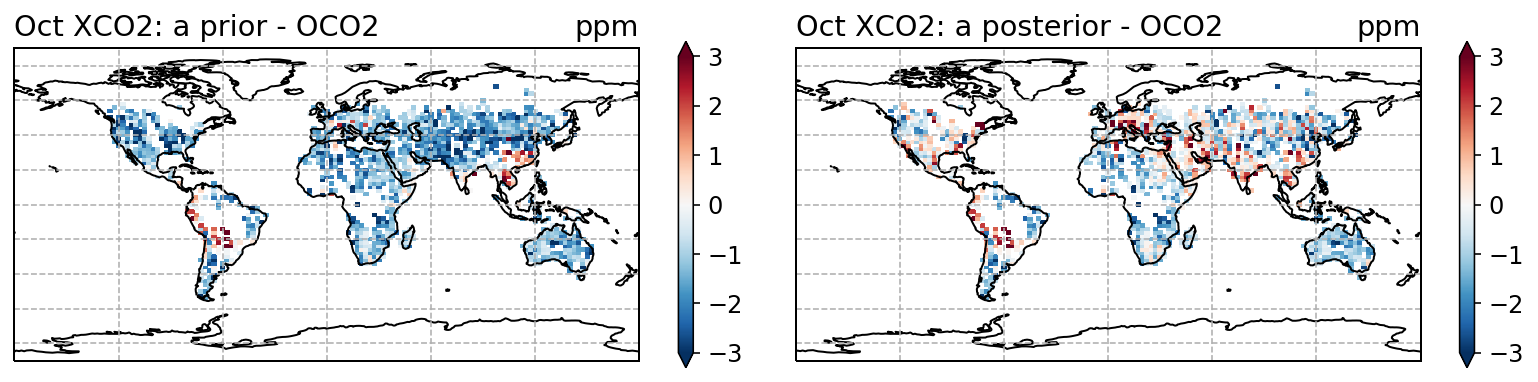

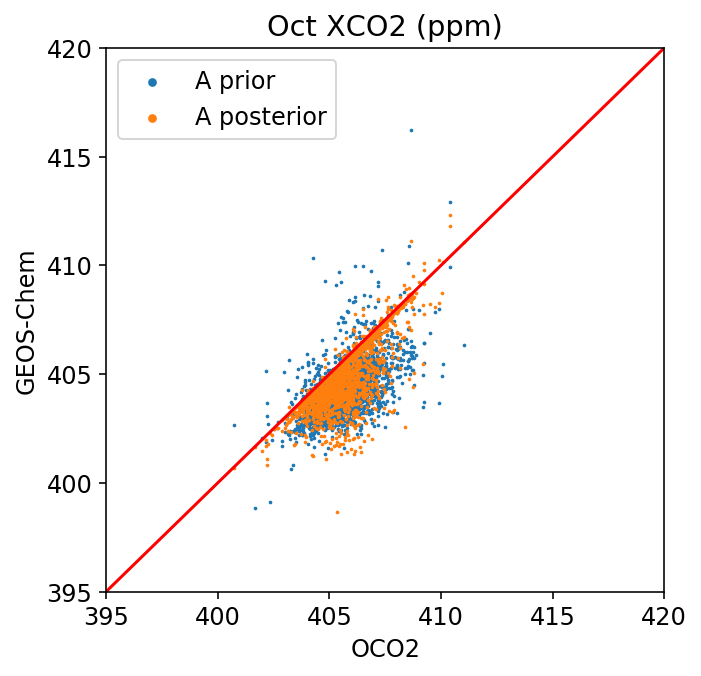

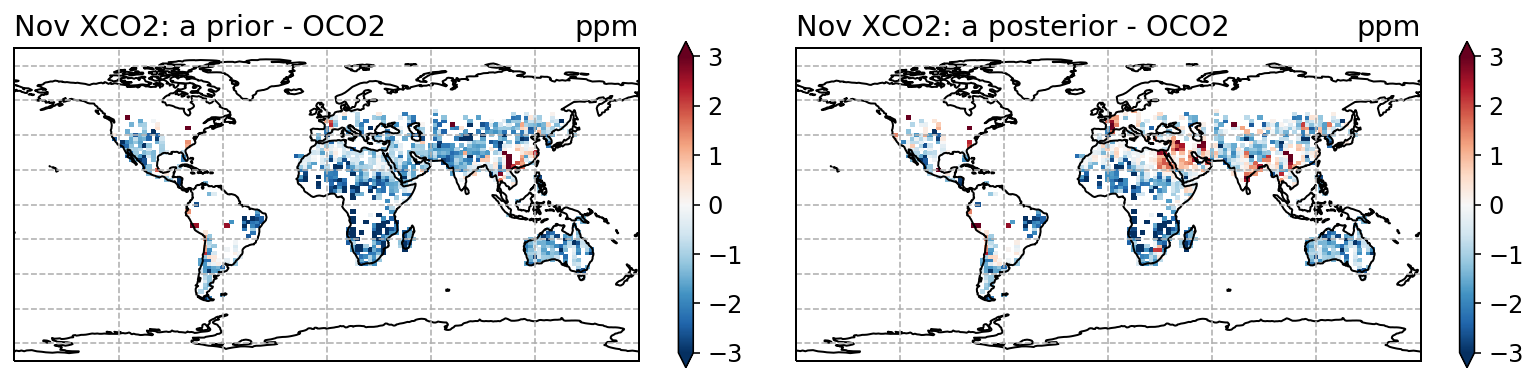

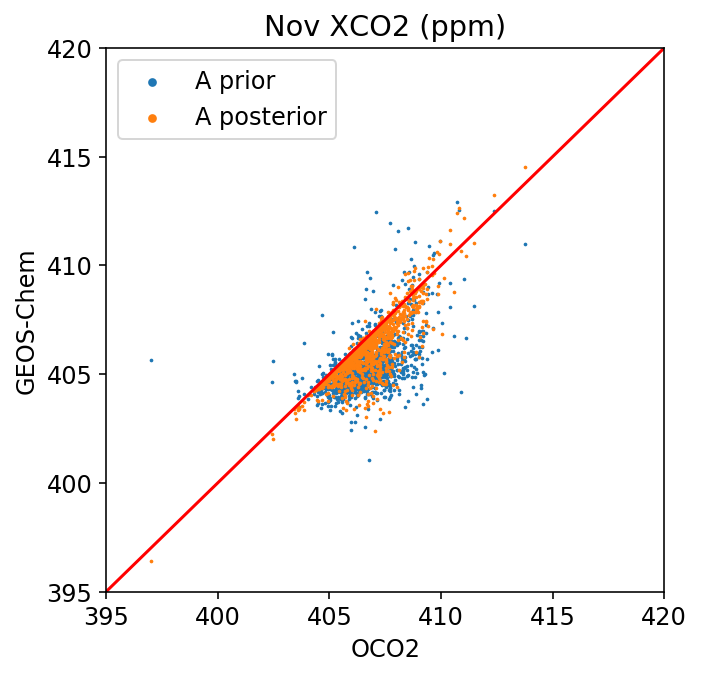

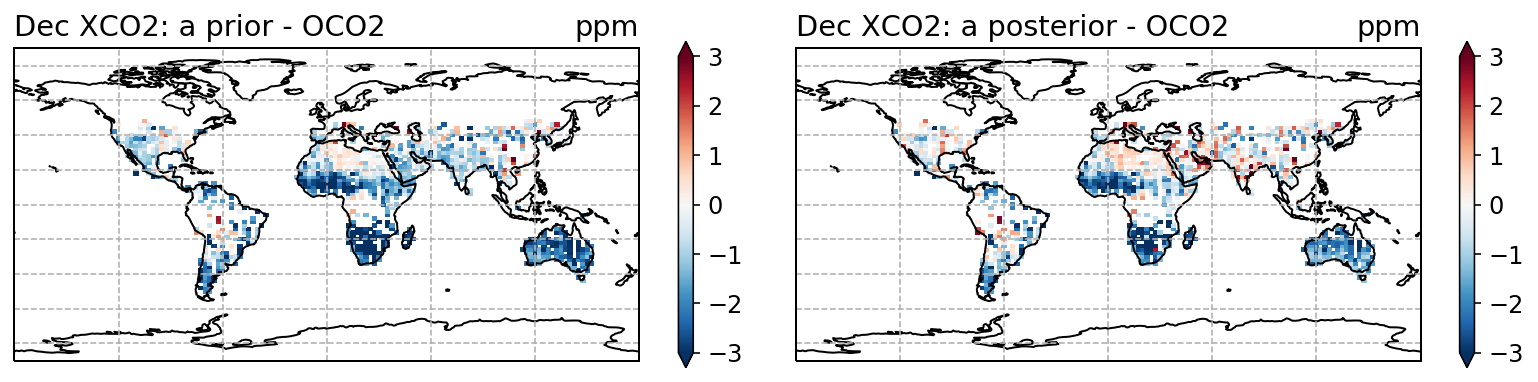

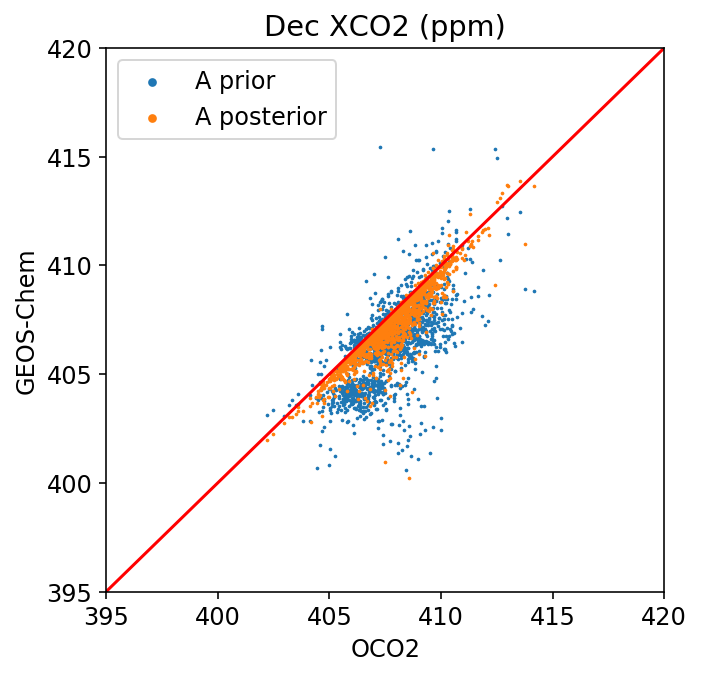

In [24]:
# sequential inversion for 12 months of output in 2018

for imonth in range(1,13):
    # read in from NetCDF files
    name_month = short_name_of_month(imonth) # Jan, Feb, Mar, ...
    ens_dir = top_dir + 'CO2-2018-' + month_string(imonth) + '/nd51/'
    
    if mode == 'N':
        delta_y0_file = 'delta_y0_model_N_' + str(imonth) + '.nc'
        xco2_file = 'XCO2_mod_and_oco2_N_' + name_month + '.nc'
    else:
        delta_y0_file = 'delta_y0_model_' + str(imonth) + '.nc'
        xco2_file = 'XCO2_mod_and_oco2_' + name_month + '.nc'
    # open datasets
    ds_delta_y0 = xr.open_dataset(ens_dir + delta_y0_file)
    varnames = list(ds_delta_y0.data_vars.keys())  # list of variable name
    needed_vars = [i for i in varnames if i.startswith('X_SpeciesConc_CO2Tag')] # species var names
    # separate one-year forward run with all CO2 fluxes on
    ds_xco2 = xr.open_dataset(mod_dir + xco2_file)
    xco2_oco2  = ds_xco2['xco2_oco2']  # XCO2 from OCO-2
    xco2_model = ds_xco2['xco2_model'] # XCO2 from model
    xco2_error = ds_xco2['xco2_error'] # measurement error from OCO-2
    diff = ds_xco2['xco2_oco2'] - ds_xco2['xco2_model']
    # reduce the size of above arrays and matrices, from ~400k to <3k
    x = xco2_oco2.copy()
    x = x[np.logical_not(np.isnan(x))]
    ind = x.record.values   # index for slicing
    nobs = len(ind) # number of observations used below
    # get slices of arrays
    diff_slice = diff[ind].values            # [nobs], 1-3k per month
    lat_slice = ds_xco2.lat[ind]
    lon_slice = ds_xco2.lon[ind]
    xco2_mod_slice = xco2_model[ind]
    xco2_oco_slice = xco2_oco2[ind]
    xco2_error_slice = xco2_error[ind].values

    if imonth == 1: # first month, different from others, use initial prior error
        # prior error
        del_X_f = np.diag(np.repeat(prior_err,22))
        updated_err[0,:] = np.diag(del_X_f) # store them for later
        # delta y0
        del_Y = np.empty((nobs,22))   # [nobs, nx]
        del_Y[:] = np.nan
        for itag, ivar in enumerate(needed_vars):
            del_Y[:,itag] = ds_delta_y0[ivar][ind].values
        #del_Y = np.dot(del_Y, del_X_f)
        # observation error
        obs_error = np.zeros((nobs,nobs))  # [nobs,nobs], diagonally store obs error
        for idiag in range(nobs):
            obs_error[idiag, idiag] = xco2_error_slice[idiag]**2 + mod_err**2
            # measurment error from oco2
            # model error and representation error = 2.5 for land
        # calculation of first posterior
        del_Y_tran = np.matrix.transpose(del_Y)     # del_y transpose [nx,nobs]
        first      = np.matmul(del_Y,del_Y_tran)    # del_y dot del_y_tran [nobs,nobs]
        second     = np.linalg.inv(first+obs_error) # (Y*Yt + R)^-1 [nobs,nobs]
        third      = np.matmul(del_Y_tran,second)   # Yt*(Y*Yt + R)^-1 [nx,nobs]
        k_e        = np.matmul(del_X_f,third)       # kalman gain, k_e = X_f*Yt*(Y*Yt + R)^-1 [nx,nobs]
        adjust     = np.matmul(k_e, diff_slice)     # adjustment to prior, k_e*(yobs - ym)  [nx]
        adjust_matrix[imonth-1,:] = adjust * monthly_ff_flux[imonth-1]
        #print('mean of yobs-ym:', "{:.2f}".format(np.mean(diff_slice)))
        print(short_name_of_month(imonth), 'adjustment: {:.2f}'.format(sum(adjust*monthly_ff_flux[imonth-1])))
        # update Y matrix
        tmp = np.dot(del_Y,adjust) # [nobs], ppm
        diff_new = diff_slice - tmp
        plot_xco2_diff(diff_slice, diff_new, lat_slice, lon_slice, imonth)
        #print('new mean of yobs-ym:', "{:.2f}".format(np.mean(diff_new)))
        # transformation matrix to update prior
        fourth = np.identity(22) - np.matmul(third, del_Y)
        transform_mat = sp.sqrtm(fourth)
        del_X_a = np.matmul(del_X_f, transform_mat)
        # updated prior error
        updated_err[1,:] = np.diag(del_X_a)
        
    else:
        # delta y0
        del_Y = np.empty((nobs,22))
        del_Y[:] = np.nan
        for itag, ivar in enumerate(needed_vars):
            del_Y[:,itag] = ds_delta_y0[ivar][ind].values
        #del_Y = np.dot(del_Y, del_X_f)
        # observation error
        obs_error = np.zeros((nobs,nobs))
        for idiag in range(nobs):
            obs_error[idiag, idiag] = xco2_error_slice[idiag]**2 + mod_err**2
            # measurment error from oco2
            # model error and representation error = 2.5 for land
        
        # calculation of posterior
        del_Y_tran = np.matrix.transpose(del_Y)
        first      = np.matmul(del_Y,del_Y_tran)
        second     = np.linalg.inv(first+obs_error)
        third      = np.matmul(del_Y_tran,second)
        k_e        = np.matmul(del_X_f,third)    # kalman gain,
        adjust     = np.matmul(k_e, diff_slice)  # adjustment to prior
        adjust_matrix[imonth-1,:] = adjust * monthly_ff_flux[imonth-1]
        #print('mean of yobs-ym:', "{:.2f}".format(np.mean(diff_slice)))
        print(short_name_of_month(imonth), 'adjustment: {:.2f}'.format(sum(adjust*monthly_ff_flux[imonth-1])))
        # update Y matrix
        tmp = np.dot(del_Y,adjust) # [nobs], ppm
        diff_new = diff_slice - tmp
        plot_xco2_diff(diff_slice, diff_new, lat_slice, lon_slice, imonth)
        #print('new mean of yobs-ym:', "{:.2f}".format(np.mean(diff_new)))
        # transformation matrix to use in next cycle
        fourth = np.identity(22) - np.matmul(third, del_Y)
        transform_mat = sp.sqrtm(fourth)
        del_X_a = np.matmul(del_X_f, transform_mat)
        # updated prior error
        updated_err[imonth,:] = np.diag(del_X_a)
        #del_X_f = del_X_a.copy()
        

In [25]:
adjusted = np.zeros(12) # global, monthly mean
posterior = np.zeros((12,22)) # regional, monthly mean, posterior
for i in range(22): posterior[:,i] = monthly_net_flux[:,i] + adjust_matrix[:,i]
adjusted = np.sum(posterior, axis = 1)

pri_err_matrix = monthly_ff_flux * 1.5
post_err_matrix = monthly_ff_flux * updated_err[:-1,:]
np.sum(pri_err_matrix), np.sum(post_err_matrix)

(15.21358725, 7.6468034827935885)

prior net: 5.51 posterior net: 9.49
prior uncertainty: 1.77
posterior uncertainty: 0.75


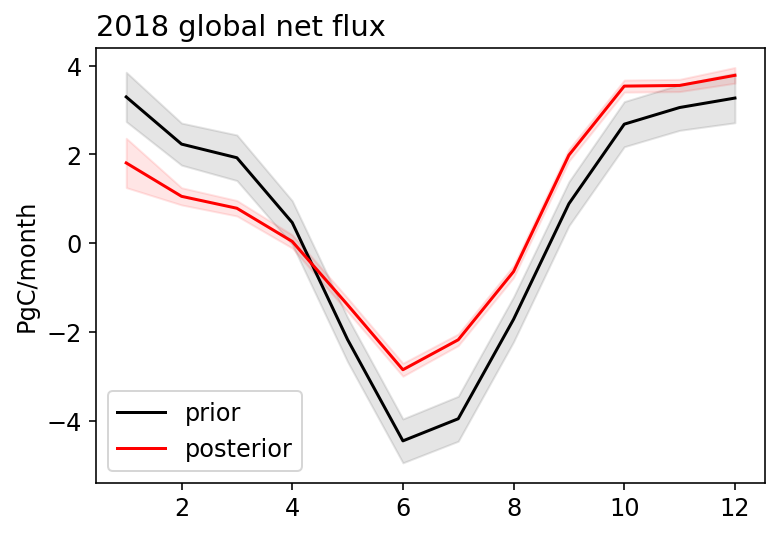

In [26]:
prior_net = sum(net_flux_2018)
post_net = sum(adjusted)
print('prior net:', "{:.2f}".format(prior_net),'posterior net:', "{:.2f}".format(post_net))

pri_err_sum = np.zeros(12)
post_err_sum = np.zeros(12)

for i in range(12): pri_err_sum[i] = np.sqrt(sum(pri_err_matrix[i,:]**2))
print('prior uncertainty:', "{:.2f}".format(np.sqrt(sum(pri_err_sum**2))))

for i in range(12): post_err_sum[i] = np.sqrt(sum(post_err_matrix[i,:]**2))
print('posterior uncertainty:', "{:.2f}".format(np.sqrt(sum(post_err_sum**2))))
    
fig, ax = plt.subplots()
# prior
ax.plot(range(1,13), net_flux_2018, label = 'prior', color = 'black')
ax.fill_between(range(1,13), net_flux_2018-pri_err_sum, net_flux_2018+pri_err_sum, color = 'black', alpha = 0.1)
# posterior
ax.plot(range(1,13), adjusted, label = 'posterior', color = 'r')
ax.fill_between(range(1,13), adjusted-post_err_sum, adjusted+post_err_sum, color='r', alpha=.1)
plt.title('2018 global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_global.png', dpi = 300)


In [27]:
input_directory = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/'
df = pd.read_csv(input_directory + 'base_emission.csv')
region_names = df['name'].values

In [28]:
#regional_updates = np.sum(adjust_matrix, axis = 0)

#x_pos = [i for i, _ in enumerate(region_names)]
#plt.bar(x_pos, regional_updates)
#plt.xticks(x_pos, region_names, rotation = 'vertical')
#plt.title('Annual adjustments', loc='left')
#plt.ylabel('PgC/month')

#fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_regions_annual.png', dpi = 300)


In [29]:
#fig = plt.figure(figsize=[6, 4])
#for i in range(12): 
#    plt.plot(range(22), adjust_matrix[i])
#    plt.xticks(range(22), region_names, rotation='vertical')
#plt.title('Monthly adjustments for regions', loc='left')
#plt.ylabel('PgC/month')
#plt.legend()


In [30]:
#fig = plt.figure(figsize=[6, 4])
#for i in range(12): 
#    plt.plot(range(22), updated_err[i])
#    plt.xticks(range(22), region_names, rotation='vertical')
#plt.title('Updated error for regions', loc='left')
#plt.ylabel('PgC/month')
#fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_err_reduction.png', dpi = 300, bbox_inches='tight')


In [31]:
# check each month's update
#for i in range(12):
    #fig = plt.figure(figsize=[6, 4])
    #plt.plot(range(1,23), monthly_net_flux[i,:], label = 'prior')
    #plt.plot(range(1,23), monthly_net_flux[i,:] + adjust_matrix[i,:], label = 'posterior')
    #plt.xticks(range(1,23), region_names, rotation='vertical')
    #plt.title(long_name_of_month(i+1))
    #plt.ylabel('PgC/month')
    #plt.legend()


In [32]:
# check each region's update
#for i in range(22):
#    fig, ax = plt.subplots()
#    x = range(1,13)
#    y = monthly_net_flux[:,i]
#    ax.plot(x, np.zeros(12), color = 'grey')
#    ax.plot(x, y, label = 'prior', color = 'black')
#    ax.fill_between(x, y-prior_err, y+prior_err, color = 'black', alpha = 0.1)
#    
#    updated = monthly_net_flux[:,i] + adjust_matrix[:,i]
#    ax.plot(x, updated, label = 'posterior', color = 'r')
#    ax.fill_between(x, updated-updated_err[:,i], updated+updated_err[:,i], color='r', alpha=.1)
#   
#    plt.title(region_names[i])
#    plt.ylabel('PgC/month')
#    plt.legend()
    
#    fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_'+str(i)+'.png', dpi = 300)


In [33]:
np.shape(monthly_net_flux[:,i])
#np.shape(pri_err_matrix[:,i])

(12,)

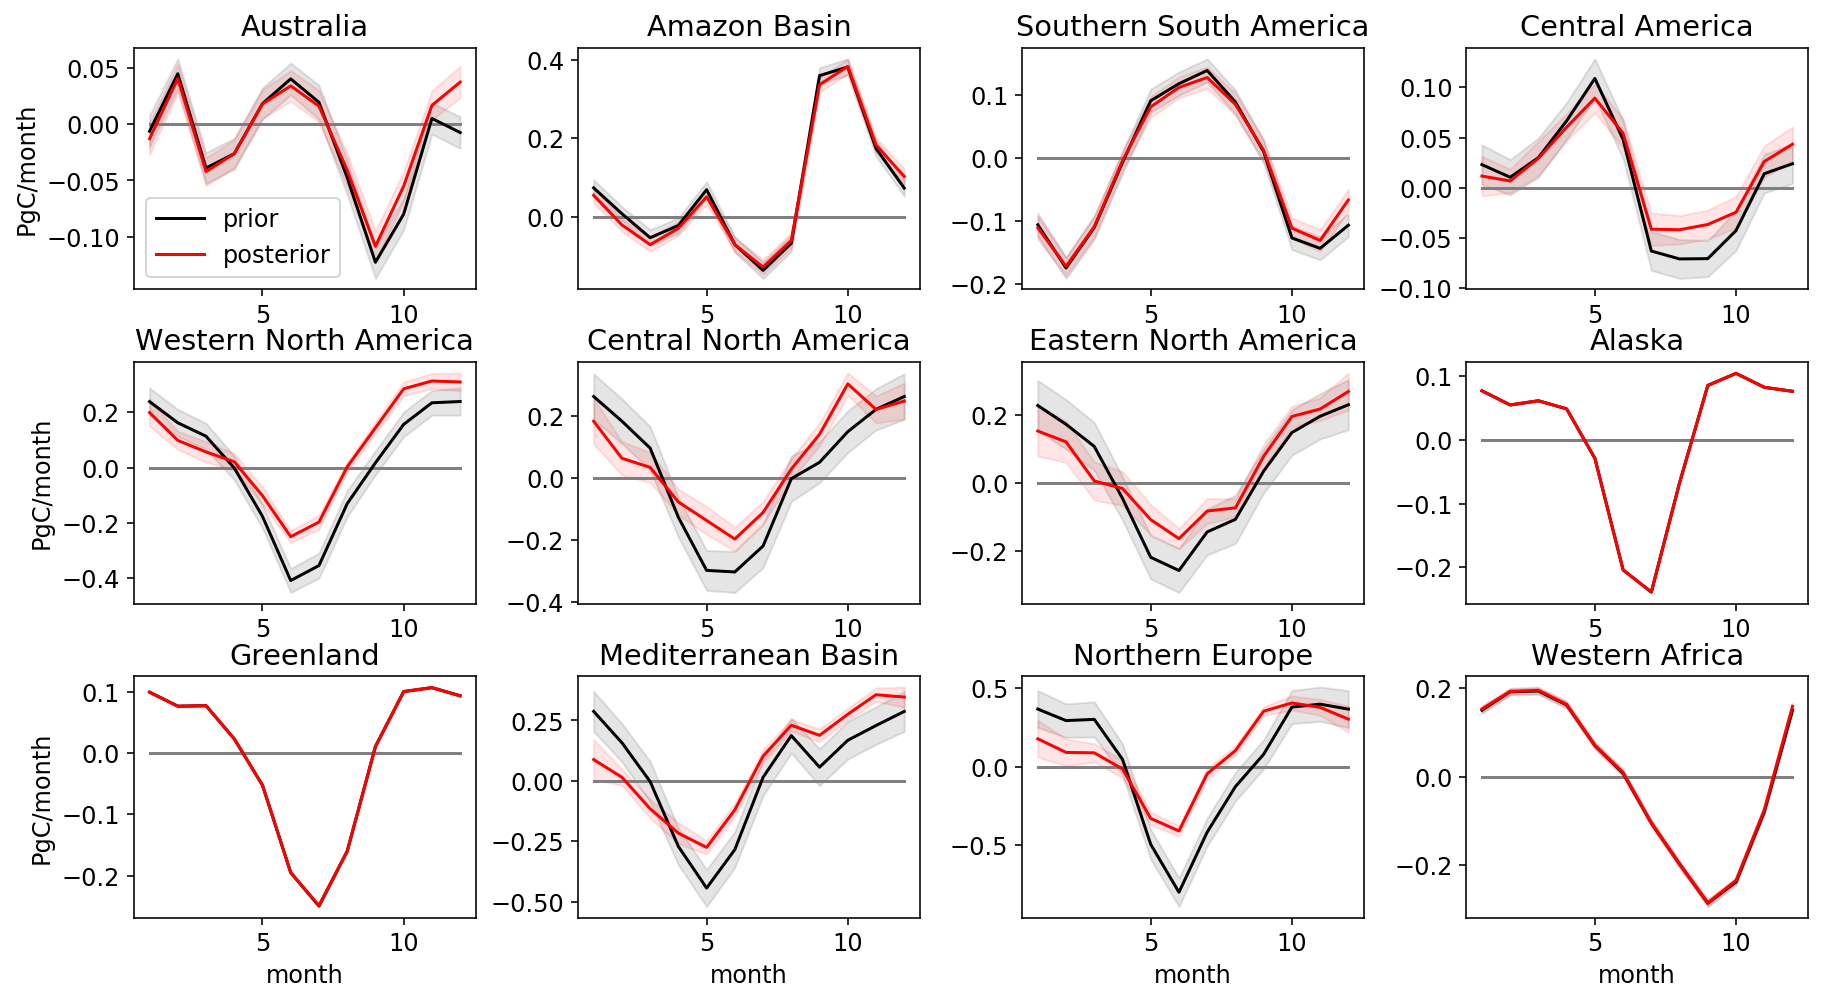

In [34]:
fig, axs = plt.subplots(3,4, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace= .3)

axs = axs.ravel()

for i in range(12):
    x = range(1,13)
    y = monthly_net_flux[:,i]
    prior_err = pri_err_matrix[:,i]
    axs[i].plot(x, np.zeros(12), color = 'grey')
    axs[i].plot(x, y, label = 'prior', color = 'black')
    axs[i].fill_between(x, y-prior_err, y+prior_err, color = 'black', alpha = 0.1)
    
    y = posterior[:,i]
    updated_err = post_err_matrix[:,i]
    axs[i].plot(x, y, label = 'posterior', color = 'r')
    axs[i].fill_between(x, y-updated_err, y+updated_err, color='r', alpha=.1)
    axs[i].set_title(region_names[i])
    
axs[0].set_ylabel('PgC/month')
axs[4].set_ylabel('PgC/month')
axs[8].set_ylabel('PgC/month')
axs[0].legend()

axs[8].set_xlabel('month')
axs[9].set_xlabel('month')
axs[10].set_xlabel('month')
axs[11].set_xlabel('month')

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_regions1.png', dpi = 300)


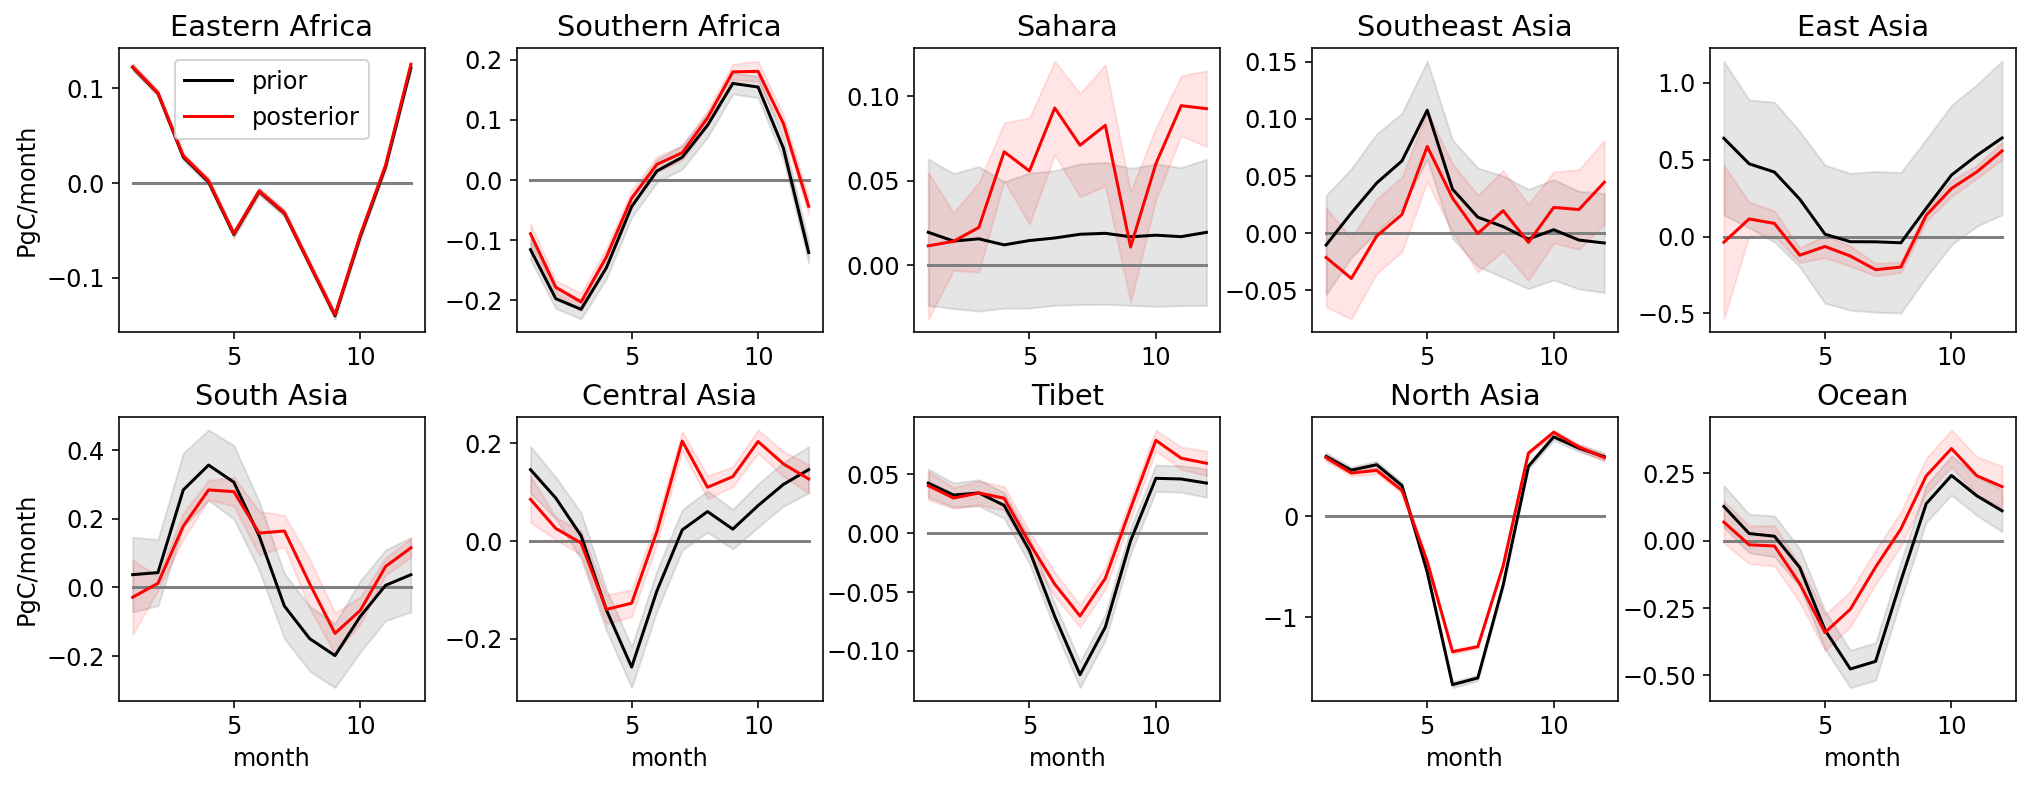

In [35]:
fig, axs = plt.subplots(2,5, figsize=(17, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace= .3)

axs = axs.ravel()

for i in range(10):
    x = range(1,13)
    imonth = i+12
    y = monthly_net_flux[:,imonth]
    prior_err = pri_err_matrix[:,i+12]
    axs[i].plot(x, np.zeros(12), color = 'grey')
    axs[i].plot(x, y, label = 'prior', color = 'black')
    axs[i].fill_between(x, y-prior_err, y+prior_err, color = 'black', alpha = 0.1)
    
    y = posterior[:,imonth]
    updated_err = post_err_matrix[:,i+12]
    axs[i].plot(x, y, label = 'posterior', color = 'r')
    axs[i].fill_between(x, y-updated_err, y+updated_err, color='r', alpha=.1)
    axs[i].set_title(region_names[imonth])
    
axs[0].set_ylabel('PgC/month')
axs[5].set_ylabel('PgC/month')
axs[0].legend()

axs[5].set_xlabel('month')
axs[6].set_xlabel('month')
axs[7].set_xlabel('month')
axs[8].set_xlabel('month')
axs[9].set_xlabel('month')

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/inversion_regions2.png', dpi = 300)



nobs: 1467
ydiff before: -1.36
ydiff after: -0.80


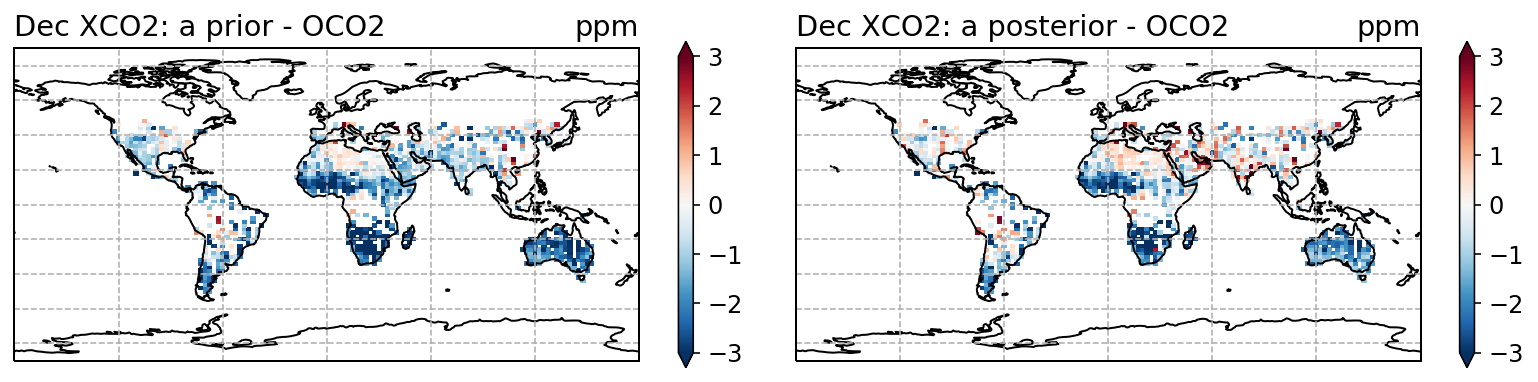

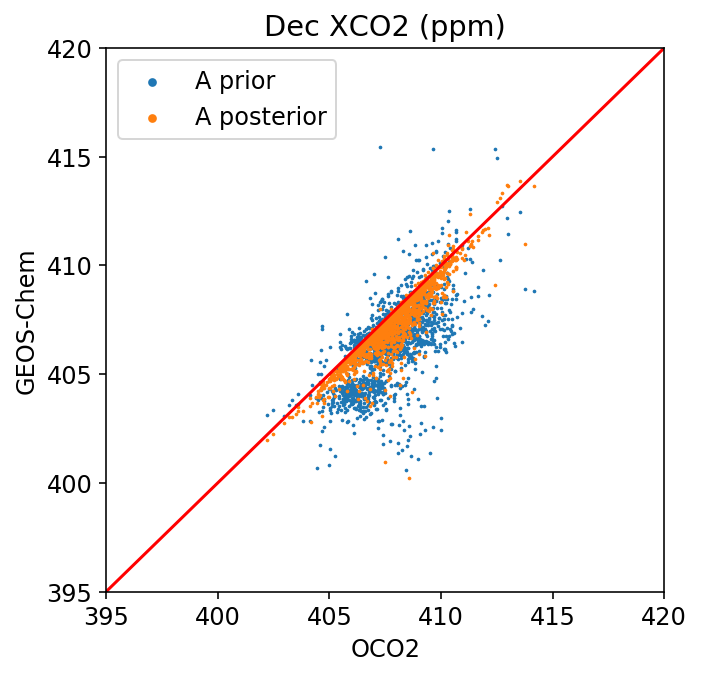

In [36]:
ds_xco2 = xr.open_dataset(mod_dir + xco2_file)
xco2_oco2  = ds_xco2['xco2_oco2']  # XCO2 from OCO-2
xco2_model = ds_xco2['xco2_model'] # XCO2 from model
xco2_error = ds_xco2['xco2_error'] # measurement error from OCO-2
diff = ds_xco2['xco2_oco2'] - ds_xco2['xco2_model']
# reduce the size of above arrays and matrices, from ~400k to <3k
x = xco2_oco2.copy()
x = x[np.logical_not(np.isnan(x))]
ind = x.record.values   # index for slicing
nobs = len(ind) # number of observations used below
print('nobs:', nobs)
# get slices of arrays
diff_slice = diff[ind].values            # [nobs], 1-3k per month
lat_slice = ds_xco2.lat[ind]
lon_slice = ds_xco2.lon[ind]
xco2_mod_slice = xco2_model[ind]
xco2_oco_slice = xco2_oco2[ind]
diff_new = diff_new

plot_xco2_diff(diff_slice, diff_new, lat_slice, lon_slice, 12)
